<a href="https://colab.research.google.com/github/IamRam3/dry-fruit-detection-segmentation/blob/main/dryfruits_detection_segmentation(kruthak_ai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat May 31 10:00:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PUUFkwivfTg0F4iOCIhU")
project = rf.workspace("cellsegment").project("dryfruits")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DryFruits-1 in yolov8:: 100%|██████████| 318/318 [00:00<00:00, 8599.21it/s]


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8n-seg.pt conf=0.25 source='/content/DryFruits-1/test/images/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg' save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,404,320 parameters, 0 gradients, 12.6 GFLOPs

image 1/1 /content/DryFruits-1/test/images/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg: 640x640 1 vase, 10.2ms
Speed: 9.3ms preprocess, 10.2ms inference, 203.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


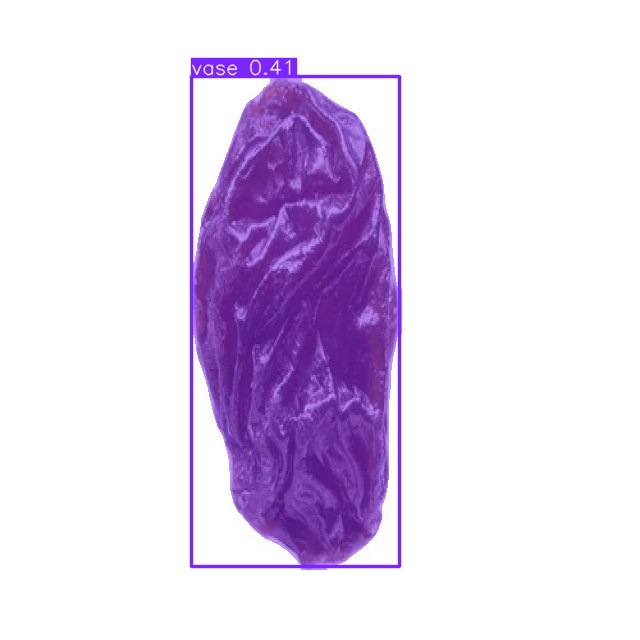

In [ ]:
%cd {HOME}
Image(filename='/content/runs/segment/predict2/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg', height=600)

In [ ]:
dataset_location = '/content/DryFruits-1'

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset_location}/data.yaml epochs=1000 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/DryFruits-1/data.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/segment/train2/weights/best.pt conf=0.25 source='/content/DryFruits-1/test/images/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg' save=True

/content
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,039 parameters, 0 gradients, 12.0 GFLOPs

image 1/1 /content/DryFruits-1/test/images/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg: 640x640 1 raisins, 11.6ms
Speed: 3.0ms preprocess, 11.6ms inference, 156.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


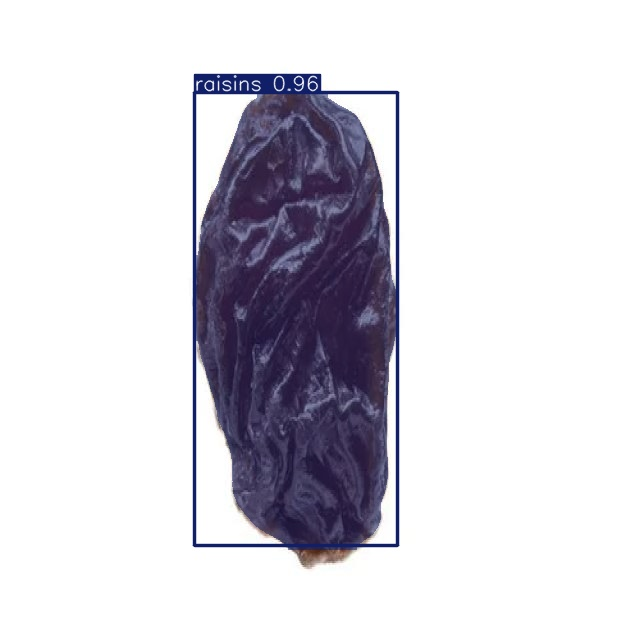

In [ ]:
%cd {HOME}
Image(filename='/content/runs/segment/predict3/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/segment/train2/weights/best.pt conf=0.4 source='/content/DryFruits-1/test/images/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg' save=True

/content
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,039 parameters, 0 gradients, 12.0 GFLOPs

image 1/1 /content/DryFruits-1/test/images/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg: 640x640 1 raisins, 20.5ms
Speed: 3.5ms preprocess, 20.5ms inference, 233.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


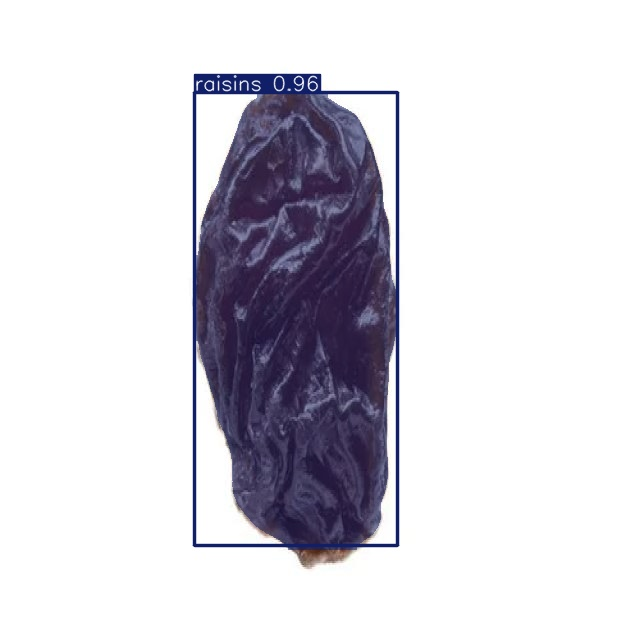

In [ ]:
%cd {HOME}
Image(filename='/content/runs/segment/predict4/360_F_120960011_Y9KmDfv8OuAKxpdq2WLOZhpMB1sU1nEQ_webp.rf.199d101ef927ba7adf59969b8f1f3d88.jpg', height=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/segment/train2/weights/best.pt conf=0.4 source='/content/DryFruits-1/test/images/date-fruit-sweet-close-up-isolated-on-a-white-background_webp.rf.66fc830dfdcd34e496666d88bb50171a.jpg' save=True

/content
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,039 parameters, 0 gradients, 12.0 GFLOPs

image 1/1 /content/DryFruits-1/test/images/date-fruit-sweet-close-up-isolated-on-a-white-background_webp.rf.66fc830dfdcd34e496666d88bb50171a.jpg: 640x640 1 other, 2 raisinss, 11.9ms
Speed: 7.5ms preprocess, 11.9ms inference, 198.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


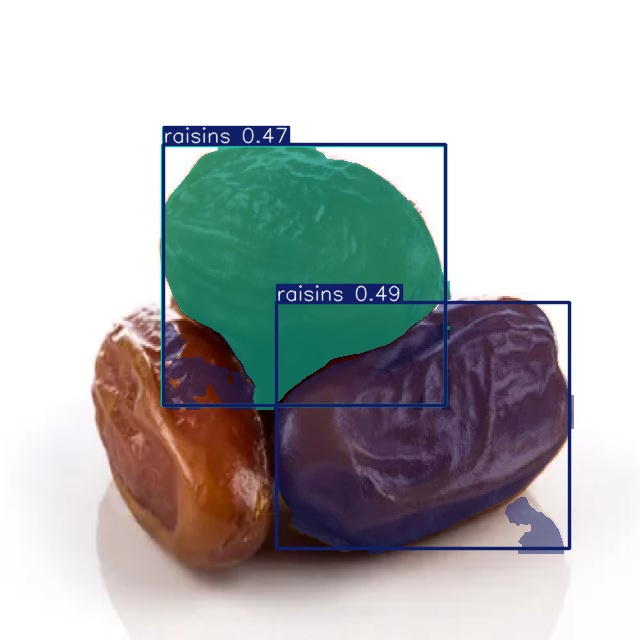

In [ ]:
%cd {HOME}
Image(filename='/content/runs/segment/predict5/date-fruit-sweet-close-up-isolated-on-a-white-background_webp.rf.66fc830dfdcd34e496666d88bb50171a.jpg', height=600)

In [ ]:
#!zip -r runs.zip runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/train3/ (stored 0%)
  adding: runs/detect/train3/weights/ (stored 0%)
  adding: runs/detect/train3/args.yaml (deflated 52%)
  adding: runs/detect/train2/ (stored 0%)
  adding: runs/detect/train2/train_batch0.jpg (deflated 8%)
  adding: runs/detect/train2/results.csv (deflated 86%)
  adding: runs/detect/train2/train_batch1.jpg (deflated 10%)
  adding: runs/detect/train2/results.png (deflated 6%)
  adding: runs/detect/train2/confusion_matrix.png (deflated 37%)
  adding: runs/detect/train2/P_curve.png (deflated 23%)
  adding: runs/detect/train2/train_batch2.jpg (deflated 8%)
  adding: runs/detect/train2/F1_curve.png (deflated 29%)
  adding: runs/detect/train2/train_batch17.jpg (deflated 11%)
  adding: runs/detect/train2/train_batch16.jpg (deflated 11%)
  adding: runs/detect/train2/weights/ (stored 0%)
  adding: runs/detect/train2/weights/last.pt (deflated 10%)
  adding: runs/detect/train2/weights/best.pt 

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PUUFkwivfTg0F4iOCIhU")
project = rf.workspace("cellsegment").project("dryfruits")
version = project.version(1)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install -q torch torchvision pycocotools

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from pycocotools.coco import COCO
from torchvision.transforms import ToTensor

class COCOSegmentationDataset(torch.utils.data.Dataset):
    def __init__(self, root, annFile, transforms=None):
        self.root = root
        self.coco = COCO(annFile)
        self.ids = list(sorted(self.coco.imgs.keys()))
        self.transforms = transforms

    def __getitem__(self, index):
        coco = self.coco
        img_id = self.ids[index]
        img_info = coco.loadImgs(img_id)[0]
        path = img_info['file_name']

        img = Image.open(os.path.join(self.root, path)).convert("RGB")

        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)

        boxes, labels, masks = [], [], []

        for ann in anns:
            if 'segmentation' not in ann:
                continue
            x, y, w, h = ann['bbox']
            boxes.append([x, y, x + w, y + h])
            labels.append(ann['category_id'])

            mask = coco.annToMask(ann)
            masks.append(mask)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([img_id])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((len(anns),), dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "masks": masks,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.ids)


In [ ]:
dataset = COCOSegmentationDataset(
    root='/content/DryFruits-1/train',
    annFile='/content/DryFruits-1/train/_annotations.coco.json',
    transforms=ToTensor()
)

data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x))
)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

model = maskrcnn_resnet50_fpn(pretrained=True)

# Update the number of classes
num_classes = len(dataset.coco.getCatIds()) + 1  # +1 for background

# Replace box predictor
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Replace mask predictor
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.


In [ ]:
import torch
from torch.optim import SGD

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = SGD([p for p in model.parameters() if p.requires_grad],
                lr=0.005, momentum=0.9, weight_decay=0.0005)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    batch_count = 0

    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        epoch_loss += losses.item()
        batch_count += 1

    avg_loss = epoch_loss / batch_count
    print(f"Epoch [{epoch+1}/{num_epochs}] - Avg Loss: {avg_loss:.4f}")


Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)


Epoch [1/10] - Avg Loss: 1.0966
Epoch [2/10] - Avg Loss: 0.5810
Epoch [3/10] - Avg Loss: 0.4359
Epoch [4/10] - Avg Loss: 0.3654
Epoch [5/10] - Avg Loss: 0.3186
Epoch [6/10] - Avg Loss: 0.2658
Epoch [7/10] - Avg Loss: 0.2574
Epoch [8/10] - Avg Loss: 0.2563
Epoch [9/10] - Avg Loss: 0.2130
Epoch [10/10] - Avg Loss: 0.1957


In [ ]:
import torch
from torch.optim import SGD
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import json
import os
import numpy as np
from tqdm import tqdm

# Assumes model, train_loader, val_loader, and val_annotations.json are defined

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

optimizer = SGD([p for p in model.parameters() if p.requires_grad],
                lr=0.005, momentum=0.9, weight_decay=0.0005)

num_epochs = 10

# Helper to convert predictions to COCO format
def convert_to_coco_format(predictions, image_ids):
    coco_results = []
    for prediction, image_id in zip(predictions, image_ids):
        boxes = prediction["boxes"].cpu().numpy()
        scores = prediction["scores"].cpu().numpy()
        labels = prediction["labels"].cpu().numpy()
        for box, score, label in zip(boxes, scores, labels):
            x_min, y_min, x_max, y_max = box
            coco_box = [x_min, y_min, x_max - x_min, y_max - y_min]  # COCO format: [x, y, width, height]
            coco_results.append({
                "image_id": image_id,
                "category_id": int(label),
                "bbox": [float(v) for v in coco_box],
                "score": float(score)
            })
    return coco_results

# Training + Evaluation Loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for images, targets in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    avg_loss = total_loss / len(train_loader)
    print(f"[Epoch {epoch+1}] Training Loss: {avg_loss:.4f}")

    # ---- VALIDATION ----
    model.eval()
    predictions = []
    image_ids = []

    with torch.no_grad():
        for images, targets in tqdm(val_loader, desc="Validating"):
            images = list(image.to(device) for image in images)
            outputs = model(images)
            predictions.extend(outputs)
            image_ids.extend([int(t["image_id"]) for t in targets])  # Make sure your dataset returns image_id

    coco_predictions = convert_to_coco_format(predictions, image_ids)

    # Save predictions to file
    os.makedirs("coco_eval", exist_ok=True)
    prediction_file = "coco_eval/predictions.json"
    with open(prediction_file, "w") as f:
        json.dump(coco_predictions, f)

    # Evaluate using COCO API
    coco_gt = COCO("val_annotations.json")  # Path to validation ground truth in COCO format
    coco_dt = coco_gt.loadRes(prediction_file)
    coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')
    coco_eval.evaluate()
    coco_eval.accumulate()
    print(f"[Epoch {epoch+1}] Evaluation Metrics:")
    coco_eval.summarize()


In [ ]:
torch.save(model.state_dict(), "maskrcnn.pth")

In [ ]:
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

# Load base model
model = maskrcnn_resnet50_fpn(pretrained=False)

# Replace head (same as during training)
num_classes = 7  # Set this to your number of classes + 1
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, 256, num_classes)

# Load trained weights
model.load_state_dict(torch.load("maskrcnn.pth", map_location='cpu'))
model.eval()
model.to("cuda" if torch.cuda.is_available() else "cpu")


Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 19.2MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu):

In [ ]:
from PIL import Image
import torchvision.transforms as T

transform = T.Compose([T.ToTensor()])
image_path = '/content/DryFruits-1/train/360_F_1133785056_1pm38mws6WlnxT2gaYJVVkQMyWfr7CBg_webp.rf.ced3f705cc5a4c89be0047a012ce21a3.jpg'
image = Image.open(image_path).convert("RGB")
image_tensor = transform(image).unsqueeze(0).to("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
with torch.no_grad():
    prediction = model(image_tensor)

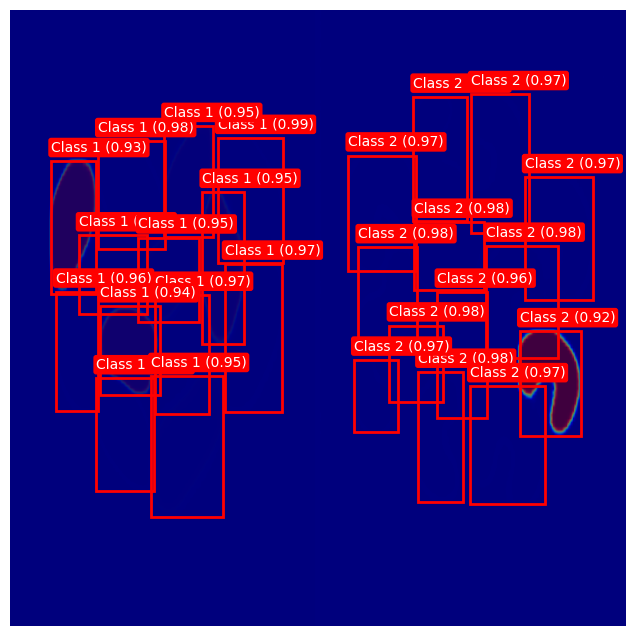

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image_np = image_tensor[0].cpu().permute(1, 2, 0).numpy()

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image_np)

# Thresholds
score_thresh = 0.5
for i in range(len(prediction[0]["scores"])):
    score = prediction[0]["scores"][i].item()
    if score > score_thresh:
        box = prediction[0]["boxes"][i].cpu().numpy()
        label = prediction[0]["labels"][i].item()
        mask = prediction[0]["masks"][i, 0].cpu().numpy()

        # Draw bounding box
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1]-10, f'Class {label} ({score:.2f})', color='white',
                bbox=dict(facecolor='red', edgecolor='none', boxstyle='round,pad=0.2'))

        # Overlay mask
        ax.imshow(mask, alpha=0.5, cmap='jet')

plt.axis('off')
plt.show()


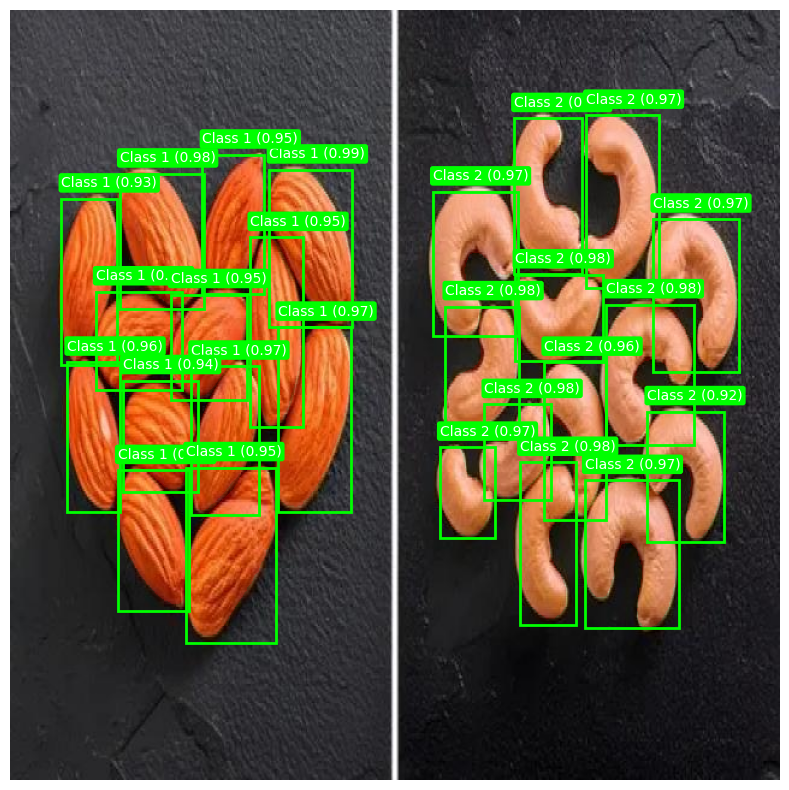

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Convert PIL image to NumPy array
image_np = np.array(image)  # use original PIL image here

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image_np)

# Overlay predictions
score_thresh = 0.5
for i in range(len(prediction[0]["scores"])):
    score = prediction[0]["scores"][i].item()
    if score > score_thresh:
        box = prediction[0]["boxes"][i].cpu().numpy()
        label = prediction[0]["labels"][i].item()
        mask = prediction[0]["masks"][i, 0].cpu().numpy()

        # Draw bounding box
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                 linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1]-10, f'Class {label} ({score:.2f})', color='white',
                bbox=dict(facecolor='lime', edgecolor='none', boxstyle='round,pad=0.2'))

        # Overlay mask with transparency
        colored_mask = np.zeros_like(image_np, dtype=np.uint8)
        colored_mask[mask > 0.5] = [255, 0, 0]  # red mask

        ax.imshow(np.dstack((colored_mask, (mask > 0.5) * 100)), alpha=0.5)

plt.axis('off')
plt.tight_layout()
plt.show()


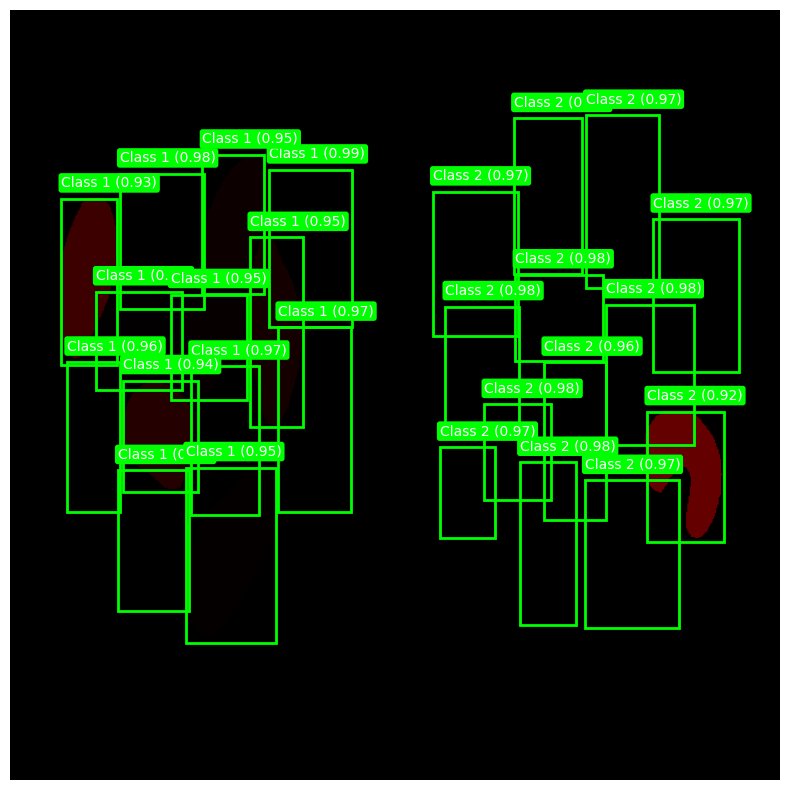

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

# Original image as NumPy array
image_np = np.array(image)

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image_np)

# Overlay predictions
score_thresh = 0.5
for i in range(len(prediction[0]["scores"])):
    score = prediction[0]["scores"][i].item()
    if score > score_thresh:
        box = prediction[0]["boxes"][i].detach().cpu().numpy()
        label = prediction[0]["labels"][i].item()
        mask = prediction[0]["masks"][i, 0].detach().cpu().numpy()

        # Bounding box
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                 linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1]-10, f'Class {label} ({score:.2f})', color='white',
                bbox=dict(facecolor='lime', edgecolor='none', boxstyle='round,pad=0.2'))

        # Overlay mask as red
        mask_bool = mask > 0.5
        red_mask = np.zeros_like(image_np, dtype=np.uint8)
        red_mask[mask_bool] = [255, 0, 0]

        # Use alpha mask
        ax.imshow(np.where(mask_bool[..., None], red_mask, 0), alpha=0.4)

plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("warcoder/dry-fruits-image")

print("Path to dataset files:", path)

100%|██████████| 328M/328M [00:10<00:00, 32.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/warcoder/dry-fruits-image/versions/1


In [ ]:
pwd

'/content'

In [ ]:
!ls /root/.cache/kagglehub/datasets/warcoder/dry-fruits-image/versions/1

'Dry Fruit Image Dataset'


In [ ]:
cd  /root/.cache/kagglehub/datasets/warcoder/dry-fruits-image/versions/1

/root/.cache/kagglehub/datasets/warcoder/dry-fruits-image/versions/1


In [ ]:
!ls

'Dry Fruit Image Dataset'


In [ ]:
cd Dry\ Fruit\ Image\ Dataset

/root/.cache/kagglehub/datasets/warcoder/dry-fruits-image/versions/1/Dry Fruit Image Dataset


In [ ]:
!ls

'DRY FRUIT IMAGE DATASET'


In [ ]:
!ls DRY\ FRUIT\ IMAGE\ DATASET

ALMOND	CASHEW	FIG  RAISIN


In [ ]:
!mv ../Dry\ Fruit\ Image\ Dataset /content

In [ ]:
import os
import random
import shutil
from collections import defaultdict

random.seed(42)

source_dir = "/content/Dry Fruit Image Dataset/DRY FRUIT IMAGE DATASET"
output_dir = "/content/sampled_dataset"
target_count = 25

os.makedirs(output_dir, exist_ok=True)

target_classes = ['almond', 'cashew', 'raisin']

for main_class in os.listdir(source_dir):
    if not main_class.lower() in target_classes:
        continue
    main_class_path = os.path.join(source_dir, main_class)
    if not os.path.isdir(main_class_path):
        continue

    # Collect all subclasses
    subclass_paths = [os.path.join(main_class_path, sub) for sub in os.listdir(main_class_path)
                      if os.path.isdir(os.path.join(main_class_path, sub))]

    # Count images in each subclass
    subclass_images = {}
    total_images = 0
    for sub_path in subclass_paths:
        images = [os.path.join(sub_path, img) for img in os.listdir(sub_path)
                  if img.lower().endswith((".png", ".jpg", ".jpeg"))]
        subclass_images[sub_path] = images
        total_images += len(images)

    # Determine how many images to sample from each subclass (proportional or equal split)
    per_subclass = defaultdict(int)
    remaining = target_count

    for i, sub_path in enumerate(subclass_paths):
        available = len(subclass_images[sub_path])
        share = target_count // len(subclass_paths)
        per_subclass[sub_path] = min(available, share)
        remaining -= per_subclass[sub_path]

    # Distribute any remaining quota
    for sub_path in subclass_paths:
        if remaining <= 0:
            break
        available = len(subclass_images[sub_path])
        if per_subclass[sub_path] < available:
            per_subclass[sub_path] += 1
            remaining -= 1

    # Sample and copy
    class_output_dir = os.path.join(output_dir, main_class)
    os.makedirs(class_output_dir, exist_ok=True)

    for sub_path in subclass_paths:
        count = per_subclass[sub_path]
        sampled = random.sample(subclass_images[sub_path], count)
        for img_path in sampled:
            filename = os.path.basename(img_path)
            new_filename = f"{os.path.basename(sub_path)}_{filename}"  # prefix with subclass
            shutil.copy(img_path, os.path.join(class_output_dir, new_filename))

print("✅ Sampling completed.")


✅ Sampling completed.


In [ ]:
main_class_path

'/content/Dry Fruit Image Dataset/DRY FRUIT IMAGE DATASET/RAISIN'

In [ ]:
!zip -r /content/sampled_dataset.zip /content/sampled_dataset

  adding: content/sampled_dataset/ (stored 0%)
  adding: content/sampled_dataset/CASHEW/ (stored 0%)
  adding: content/sampled_dataset/CASHEW/CASHEW_REGULAR_CASHEW_REGULAR_357.jpg (deflated 3%)
  adding: content/sampled_dataset/CASHEW/CASHEW_JUMBO_CASHEW_JUMBO_466.jpg (deflated 1%)
  adding: content/sampled_dataset/CASHEW/CASHEW_REGULAR_CASHEW_REGULAR_394.jpg (deflated 3%)
  adding: content/sampled_dataset/CASHEW/CASHEW_JUMBO_CASHEW_JUMBO_510.jpg (deflated 1%)
  adding: content/sampled_dataset/CASHEW/CASHEW_SPECIAL_CASHEW_SPECIAL_46.jpg (deflated 2%)
  adding: content/sampled_dataset/CASHEW/CASHEW_JUMBO_CASHEW_JUMBO_471.jpg (deflated 1%)
  adding: content/sampled_dataset/CASHEW/CASHEW_REGULAR_CASHEW_REGULAR_863.jpg (deflated 3%)
  adding: content/sampled_dataset/CASHEW/CASHEW_SPECIAL_CASHEW_SPECIAL_724.jpg (deflated 3%)
  adding: content/sampled_dataset/CASHEW/CASHEW_JUMBO_CASHEW_JUMBO_479.jpg (deflated 1%)
  adding: content/sampled_dataset/CASHEW/CASHEW_REGULAR_CASHEW_REGULAR_737.jpg 